# <h1> <center>PeopleSoft Employee Salary Prediction </center> </h1>

This case study is to retrieve the employee data from the PeopleSoft HCM environment using Open search and predict the salary of the employee based on the current work level and work experience.

<b>Import Python Libraries<b>

Importing the required Python libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
import requests
import warnings
warnings.filterwarnings('ignore')

Using request library, retrieve the open search index for the employee data and request status code 200 means the retrieval was successful

In [2]:
req = requests.get('http://129.146.34.6:9200/emp_salary_hcmad4_orcl_es_alias/_search?size=1', auth=('esadmin','esadmin'), 
                    headers={'SearchUser': 'PS', 'Content-Type':'application/json'})
print(req.status_code)

200


Output the current json request

In [3]:
req.json()

{'took': 10,
 'timed_out': False,
 '_shards': {'total': 5, 'successful': 5, 'skipped': 0, 'failed': 0},
 'hits': {'total': {'value': 3072, 'relation': 'eq'},
  'max_score': 1.0,
  'hits': [{'_index': 'emp_salary_hcmad4',
    '_id': 'http://psft-hcm-ml.sub11120630060.tempvcn.oraclevcn.com:8000/psc/ps_newwin/EMPLOYEE/HRMS/c/EL_EMPLOYEE_FL.HR_EE_ADDR_FL.GBL?&EMPLID=KA0034',
    '_score': 1.0,
    '_source': {'ORCL_ES_LINK': 'http://psft-hcm-ml.sub11120630060.tempvcn.oraclevcn.com:8000/psc/ps_newwin/EMPLOYEE/HRMS/c/EL_EMPLOYEE_FL.HR_EE_ADDR_FL.GBL?&EMPLID=KA0034',
     'EMPLID_ORCL_ES_ENG': 'KA0034',
     'ORCL_ES_LANGUAGE_CD_ENG': 'ENG',
     'PORTAL_NAME': 'PTSF_NONE',
     'CITY_ORCL_ES_ENG': '',
     'PTSF_NAV_MODE': ['2', '3'],
     'DEPTNAME_ORCL_ES_ENG': 'Admininstration',
     'SEX_ORCL_ES_ENG': 'M',
     'ORCL_ES_LAST_MODIFIED_DATE': '2018-11-15T11:23:28.000Z',
     'LASTUPDDTTM_ORCL_ES_ENG': '2018-11-15T11:23:28.000Z',
     'PTSF_SBO_NAME': 'HCM_FUBAXDFIFML EMP_SALARY',
     'JOB

In [4]:
req = requests.get('http://129.146.34.6:9200/emp_salary_hcmad4_orcl_es_alias/_search?size=200', auth=('esadmin','esadmin'), 
                    headers={'SearchUser': 'PS', 'Content-Type':'application/json'})
print(req.status_code)

200


Converting the json data into a pandas dataframe

In [5]:
raw_json = req.json()
df = pd.DataFrame.from_dict(raw_json)

Output the dataframe df

In [6]:
df

,took,timed_out,_shards,hits
total,4,False,5.0,"{'value': 3072, 'relation': 'eq'}"
successful,4,False,5.0,NaN
skipped,4,False,0.0,NaN
failed,4,False,0.0,NaN
max_score,4,False,NaN,1.0
hits,4,False,NaN,"[{'_index': 'emp_salary_hcmad4', '_id': 'http:..."


From the above json data, hits is the column which has all the required employee data and we would need format and align the column. So we extract the hits column

In [7]:
hits=df['hits']['hits']

Output only the first row of hits to understand what all fields are required 

In [8]:
hits[0]

{'_index': 'emp_salary_hcmad4',
 '_id': 'http://psft-hcm-ml.sub11120630060.tempvcn.oraclevcn.com:8000/psc/ps_newwin/EMPLOYEE/HRMS/c/EL_EMPLOYEE_FL.HR_EE_ADDR_FL.GBL?&EMPLID=KA0034',
 '_score': 1.0,
 '_source': {'ORCL_ES_LINK': 'http://psft-hcm-ml.sub11120630060.tempvcn.oraclevcn.com:8000/psc/ps_newwin/EMPLOYEE/HRMS/c/EL_EMPLOYEE_FL.HR_EE_ADDR_FL.GBL?&EMPLID=KA0034',
  'EMPLID_ORCL_ES_ENG': 'KA0034',
  'ORCL_ES_LANGUAGE_CD_ENG': 'ENG',
  'PORTAL_NAME': 'PTSF_NONE',
  'CITY_ORCL_ES_ENG': '',
  'PTSF_NAV_MODE': ['2', '3'],
  'DEPTNAME_ORCL_ES_ENG': 'Admininstration',
  'SEX_ORCL_ES_ENG': 'M',
  'ORCL_ES_LAST_MODIFIED_DATE': '2018-11-15T11:23:28.000Z',
  'LASTUPDDTTM_ORCL_ES_ENG': '2018-11-15T11:23:28.000Z',
  'PTSF_SBO_NAME': 'HCM_FUBAXDFIFML EMP_SALARY',
  'JOBTITLE_ORCL_ES_ENG': 'Manager-Branch',
  'ORCL_ES_TITLE_ENG': 'KA0034',
  'FIRST_NAME_SRCH_ORCL_ES_ENG': 'FINONA',
  'LAST_NAME_SRCH_ORCL_ES_ENG': 'DAVIS',
  'ORCL_ES_DESCRIPTION_ENG': 'KA0034',
  'ANNUAL_RT_ORCL_ES_ENG': 95000}}

We will now normalize the json data and use hits column to extract the required information and store in a dataframe

In [9]:
FullData=pd.json_normalize(hits, meta='_source')

Output the data from the new dataframe FullData and print the result of first 5 rows using head()

In [10]:
FullData.head()

,_index,_id,_score,_source.ORCL_ES_LINK,_source.EMPLID_ORCL_ES_ENG,_source.ORCL_ES_LANGUAGE_CD_ENG,_source.PORTAL_NAME,_source.CITY_ORCL_ES_ENG,_source.PTSF_NAV_MODE,_source.DEPTNAME_ORCL_ES_ENG,_source.SEX_ORCL_ES_ENG,_source.ORCL_ES_LAST_MODIFIED_DATE,_source.LASTUPDDTTM_ORCL_ES_ENG,_source.PTSF_SBO_NAME,_source.JOBTITLE_ORCL_ES_ENG,_source.ORCL_ES_TITLE_ENG,_source.FIRST_NAME_SRCH_ORCL_ES_ENG,_source.LAST_NAME_SRCH_ORCL_ES_ENG,_source.ORCL_ES_DESCRIPTION_ENG,_source.ANNUAL_RT_ORCL_ES_ENG
0,emp_salary_hcmad4,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,1.0,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,KA0034,ENG,PTSF_NONE,,"[2, 3]",Admininstration,M,2018-11-15T11:23:28.000Z,2018-11-15T11:23:28.000Z,HCM_FUBAXDFIFML EMP_SALARY,Manager-Branch,KA0034,FINONA,DAVIS,KA0034,95000.000
1,emp_salary_hcmad4,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,1.0,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,KALD01,ENG,PTSF_NONE,Annandale,"[2, 3]",Shipping,M,2004-10-12T12:24:09.000Z,2004-10-12T12:24:09.000Z,HCM_FUBAXDFIFML EMP_SALARY,Clerk-Shipping,KALD01,PETER,JONES,KALD01,15000.084
2,emp_salary_hcmad4,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,1.0,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,KALF15,ENG,PTSF_NONE,Seaforth,"[2, 3]",Shipping,F,2004-10-12T14:47:04.000Z,2004-10-12T14:47:04.000Z,HCM_FUBAXDFIFML EMP_SALARY,Clerk-Shipping,KALF15,HELEN,HUTCHINSON,KALF15,21320.004
3,emp_salary_hcmad4,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,1.0,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,KALB02,ENG,PTSF_NONE,St Kilda,"[2, 3]",Assembly,F,2004-10-12T10:12:08.000Z,2004-10-12T10:12:08.000Z,HCM_FUBAXDFIFML EMP_SALARY,Assembler,KALB02,MELISSA,FELDERMAN,KALB02,24996.400
4,emp_salary_hcmad4,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,1.0,http://psft-hcm-ml.sub11120630060.tempvcn.orac...,KFLA05,ENG,PTSF_NONE,Saint-ouen,"[2, 3]",France Headquarters,F,2005-02-01T08:08:08.000Z,2005-02-01T08:08:08.000Z,HCM_FUBAXDFIFML EMP_SALARY,Director-Operations,KFLA05,CATHERINE,GILLES,KFLA05,0.000


List down all the columns of the dataframe FullData

In [11]:
FullData.columns

Index(['_index', '_id', '_score', '_source.ORCL_ES_LINK',
       '_source.EMPLID_ORCL_ES_ENG', '_source.ORCL_ES_LANGUAGE_CD_ENG',
       '_source.PORTAL_NAME', '_source.CITY_ORCL_ES_ENG',
       '_source.PTSF_NAV_MODE', '_source.DEPTNAME_ORCL_ES_ENG',
       '_source.SEX_ORCL_ES_ENG', '_source.ORCL_ES_LAST_MODIFIED_DATE',
       '_source.LASTUPDDTTM_ORCL_ES_ENG', '_source.PTSF_SBO_NAME',
       '_source.JOBTITLE_ORCL_ES_ENG', '_source.ORCL_ES_TITLE_ENG',
       '_source.FIRST_NAME_SRCH_ORCL_ES_ENG',
       '_source.LAST_NAME_SRCH_ORCL_ES_ENG', '_source.ORCL_ES_DESCRIPTION_ENG',
       '_source.ANNUAL_RT_ORCL_ES_ENG'],
      dtype='object')

Now create a new dataframe from the FullData columns and only store required columns in the new dataframe

In [12]:
NewData = FullData[['_source.DEPTNAME_ORCL_ES_ENG','_source.JOBTITLE_ORCL_ES_ENG','_source.SEX_ORCL_ES_ENG','_source.ANNUAL_RT_ORCL_ES_ENG']].copy()

Output the data from the NewData dataframe, this dataset has around 200 rows and 4 columns

In [13]:
NewData

,_source.DEPTNAME_ORCL_ES_ENG,_source.JOBTITLE_ORCL_ES_ENG,_source.SEX_ORCL_ES_ENG,_source.ANNUAL_RT_ORCL_ES_ENG
0,Admininstration,Manager-Branch,M,95000.000
1,Shipping,Clerk-Shipping,M,15000.084
2,Shipping,Clerk-Shipping,F,21320.004
3,Assembly,Assembler,F,24996.400
4,France Headquarters,Director-Operations,F,0.000
...,...,...,...,...
195,Eastern Sales Region,Officer-Account Sr,F,64800.000
196,Western Sales Region,Accounting Clerk,M,153400.000
197,Western Sales Region,Accounting Clerk,M,176800.000
198,Sales and Services,Representative-Sales,F,100000.000


We will now modify the column names from NewData to have meaningful column names for a better understanding

In [14]:
NewData.columns=["DeptName","JobTitle","Sex","Salary"]

We will add an index (id) into the NewData dataframe

In [15]:
NewData.insert(0,'id',NewData.index+1)

NewData with the added (id) index, now there are 5 columns

In [16]:
NewData

,id,DeptName,JobTitle,Sex,Salary
0,1,Admininstration,Manager-Branch,M,95000.000
1,2,Shipping,Clerk-Shipping,M,15000.084
2,3,Shipping,Clerk-Shipping,F,21320.004
3,4,Assembly,Assembler,F,24996.400
4,5,France Headquarters,Director-Operations,F,0.000
...,...,...,...,...,...
195,196,Eastern Sales Region,Officer-Account Sr,F,64800.000
196,197,Western Sales Region,Accounting Clerk,M,153400.000
197,198,Western Sales Region,Accounting Clerk,M,176800.000
198,199,Sales and Services,Representative-Sales,F,100000.000


We will now export this new data into a csv file for reference

In [17]:
NewData.to_csv('Employee_data.csv', index=False)

We will now read the data from level-experience csv file and print the output. This dataset has 200 rows and 3 columns

In [18]:
Level_experience = pd.read_csv('level-experience.csv')
Level_experience

,id,Level,Experience
0,1,5,5.80
1,2,1,1.20
2,3,2,2.30
3,4,2,2.50
4,5,0,0.00
...,...,...,...
195,196,4,4.90
196,197,7,7.70
197,198,7,7.11
198,199,6,6.30


Merging the 2 datasets NewData and Level_experience on its id, to create a new dataset which has all the new features

In [19]:
dataset = pd.merge(NewData,Level_experience, on = 'id')

Output the new dataset, it has 200 rows and 7 columns

In [20]:
dataset

,id,DeptName,JobTitle,Sex,Salary,Level,Experience
0,1,Admininstration,Manager-Branch,M,95000.000,5,5.80
1,2,Shipping,Clerk-Shipping,M,15000.084,1,1.20
2,3,Shipping,Clerk-Shipping,F,21320.004,2,2.30
3,4,Assembly,Assembler,F,24996.400,2,2.50
4,5,France Headquarters,Director-Operations,F,0.000,0,0.00
...,...,...,...,...,...,...,...
195,196,Eastern Sales Region,Officer-Account Sr,F,64800.000,4,4.90
196,197,Western Sales Region,Accounting Clerk,M,153400.000,7,7.70
197,198,Western Sales Region,Accounting Clerk,M,176800.000,7,7.11
198,199,Sales and Services,Representative-Sales,F,100000.000,6,6.30


<b>Exploratory Data Analysis<b>

In statistics, exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.

Dataset info gives information on the datatype, null values, total entries in the dataset.

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          200 non-null    int64  
 1   DeptName    200 non-null    object 
 2   JobTitle    200 non-null    object 
 3   Sex         200 non-null    object 
 4   Salary      200 non-null    float64
 5   Level       200 non-null    int64  
 6   Experience  200 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 12.5+ KB


With dataset describe, we get to have an understanding of count,variance, standard deviation and how the data is spread across each column.This will only retrive information from the numerical data

In [22]:
dataset.describe()

,id,Salary,Level,Experience
count,200.000000,2.000000e+02,200.000000,200.000000
mean,100.500000,1.333211e+05,3.720000,4.191600
std,57.879185,3.773974e+05,2.684704,2.753483
min,1.000000,0.000000e+00,0.000000,0.000000
25%,50.750000,2.600000e+04,2.000000,2.500000
50%,100.500000,4.631500e+04,3.000000,3.650000
75%,150.250000,8.561000e+04,5.000000,5.125000
max,200.000000,2.400000e+06,13.000000,13.900000


Corr will provide information on how the data is correlated with each other. From the below information, we can see that Salary is highly correlated with Level and Experience

In [23]:
dataset.corr()

,id,Salary,Level,Experience
id,1.000000,0.042117,0.065681,0.079169
Salary,0.042117,1.000000,0.738541,0.728834
Level,0.065681,0.738541,1.000000,0.993334
Experience,0.079169,0.728834,0.993334,1.000000


The correlation data is also represented in the form of heatmap using seaborn library

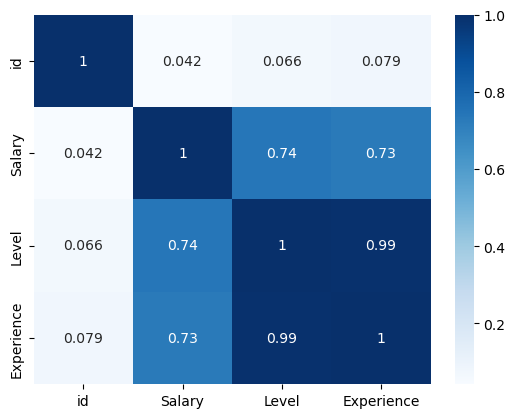

In [24]:
sns.heatmap(data=dataset.corr(), cmap='Blues', annot=True)
plt.show()

From the dataset, we will now analyse Level column to find the unique values present in it. It has level starting from 1 to 13

In [25]:
dataset.Level.unique()

array([ 5,  1,  2,  0,  4,  7,  3,  9, 13,  6, 12, 11, 10], dtype=int64)

From the countplot graph, we see that the major level of employees is around level 2,3,4

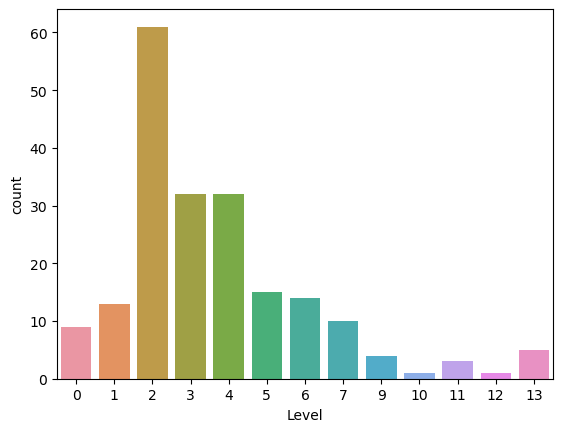

In [26]:
sns.countplot(data=dataset, x=dataset.Level);

From the dataset, we will now analyse Experience column to find the unique values present in it. The experience column shows data with exp starting from 1 to 13.9 (max)

In [27]:
dataset.Experience.unique()

array([ 5.8 ,  1.2 ,  2.3 ,  2.5 ,  0.  ,  2.7 ,  4.4 ,  2.1 ,  1.3 ,
        1.5 ,  2.8 ,  7.5 ,  3.3 ,  9.4 ,  7.7 , 13.8 ,  9.5 ,  7.6 ,
        1.  ,  7.2 ,  2.6 ,  3.7 ,  6.1 ,  5.5 ,  0.8 ,  7.3 ,  3.9 ,
        2.4 ,  4.7 ,  4.2 ,  3.8 ,  5.4 ,  5.1 ,  4.8 ,  4.3 ,  3.4 ,
        4.6 ,  5.7 ,  5.3 ,  2.9 ,  4.5 ,  4.9 , 12.5 ,  0.5 ,  3.  ,
        0.2 ,  1.1 ,  6.6 ,  6.3 ,  1.7 ,  9.6 ,  9.9 ,  3.6 ,  0.7 ,
        6.4 ,  2.2 , 11.7 ,  3.5 ,  5.2 ,  3.2 ,  1.4 ,  5.  , 11.9 ,
       13.1 , 13.9 ,  6.2 ,  6.5 ,  6.9 , 10.5 , 13.2 ,  7.4 , 11.3 ,
        3.1 ,  7.11,  4.11])

Analysing all the three columns together Salary,Level and Work Experience

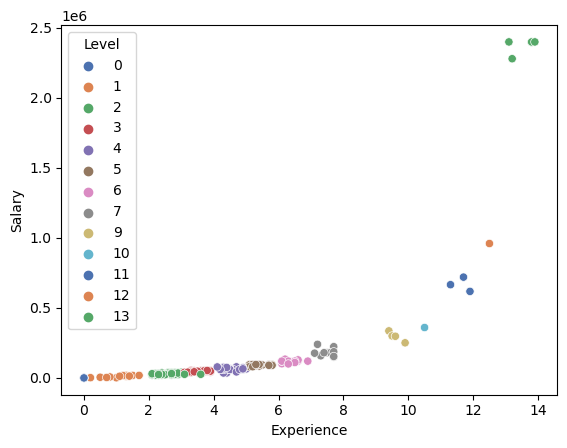

In [28]:
scatter_chart = sns.scatterplot(data=dataset,x='Experience',y='Salary',hue = 'Level', palette='deep')


From the above plot, beyond experience 12 years and level 12, the salary is on the higher side and this is considered to be an outlier and we need to minimize the impact of this data on the overall dataset

Also,using pairplot to plot and analyse the complete dataset

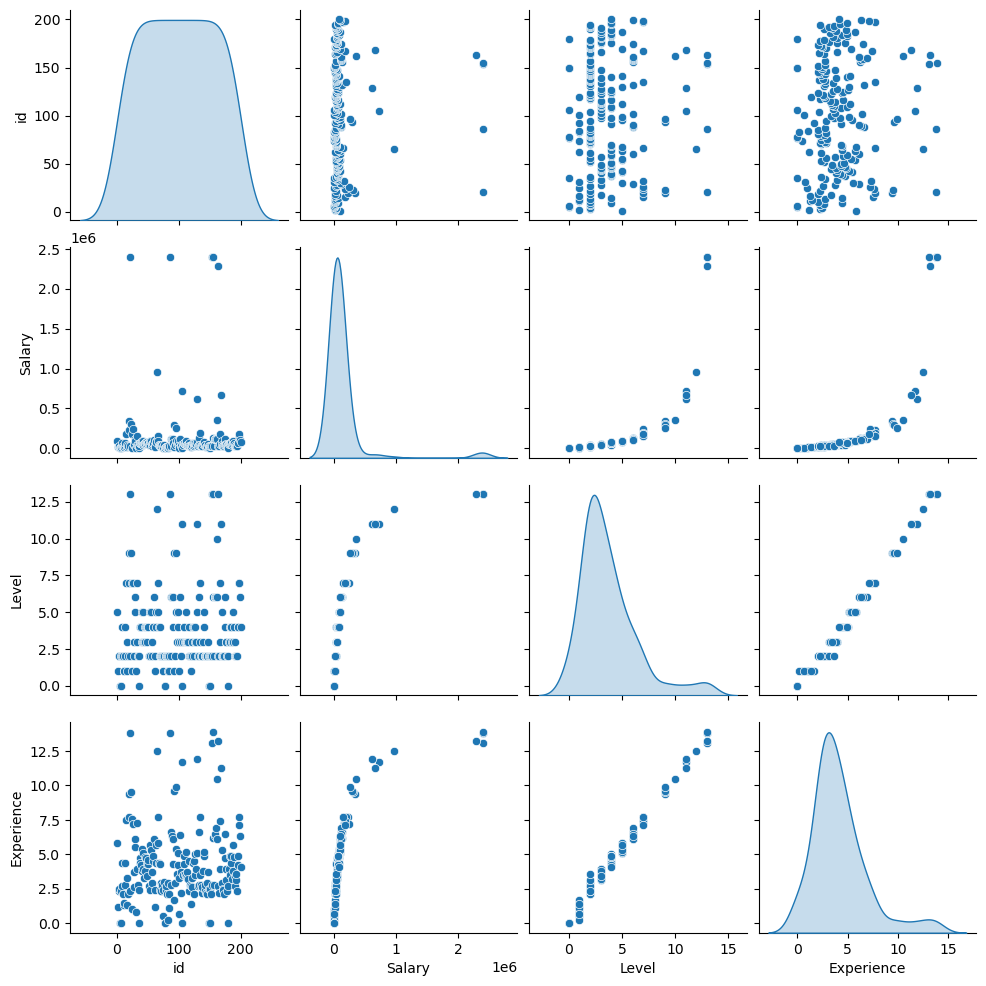

In [29]:
sns.pairplot(data=dataset, diag_kind='kde');

We will now analyse the Salary column and check for invalid entries and remove  the Outliers

Let's check the employee salary count greater than 0, there are 9 employees for whom salary is 0

In [30]:
dataset[dataset.Salary>0]

,id,DeptName,JobTitle,Sex,Salary,Level,Experience
0,1,Admininstration,Manager-Branch,M,95000.000,5,5.80
1,2,Shipping,Clerk-Shipping,M,15000.084,1,1.20
2,3,Shipping,Clerk-Shipping,F,21320.004,2,2.30
3,4,Assembly,Assembler,F,24996.400,2,2.50
6,7,Operations- Paris,Clerk,F,21087.358,2,2.30
...,...,...,...,...,...,...,...
195,196,Eastern Sales Region,Officer-Account Sr,F,64800.000,4,4.90
196,197,Western Sales Region,Accounting Clerk,M,153400.000,7,7.70
197,198,Western Sales Region,Accounting Clerk,M,176800.000,7,7.11
198,199,Sales and Services,Representative-Sales,F,100000.000,6,6.30


We will store the extracted dataset for salary > 0 and remove the empty entries

In [31]:
dataset = dataset[dataset.Salary>0]

Removing the Outliers which have extreme salary values using Inter Quartile Range (IQR). We will perform a set of steps to remove the lower and upper limit outliers

In [32]:
percentile25 = dataset['Salary'].quantile(0.25)
percentile75 = dataset['Salary'].quantile(0.75)
print (percentile25)
print (percentile75)

28560.0
90000.0


In [33]:
iqr=percentile75-percentile25
iqr

61440.0

In [34]:
lower_limit = percentile25 - 1.5 * iqr
upper_limit = percentile75 + 1.5 * iqr

print (lower_limit)
print (upper_limit)

-63600.0
182160.0


These are the list of outliers which have extreme values and does not provide meaningful results

In [35]:
dataset[(dataset.Salary < lower_limit) | (dataset.Salary > upper_limit)]

,id,DeptName,JobTitle,Sex,Salary,Level,Experience
18,19,GP US Dept D,Chief Executive Officer,M,336000.0,9,9.4
19,20,Vice Presidency,Director,M,223200.0,7,7.7
20,21,Recruitment,Assistant,F,2397600.0,13,13.8
22,23,Shipping,Director-Administration,M,300000.0,9,9.5
25,26,Human Resources,Accountant,F,240000.0,7,7.2
64,65,Human Resources,Administrator-Human Resources,F,960000.0,12,12.5
85,86,Human Resources,Manager-Human Resources,M,2400000.0,13,13.8
92,93,Vice Presidency,Director,F,297600.0,9,9.6
95,96,Sales and Services,Administrator,F,250800.0,9,9.9
104,105,Human Resources,Specialist-Employment,M,720000.0,11,11.7


In this step, we will use a condition to not include the above outliers in our new dataset

In [36]:
new_dataset=dataset[(dataset.Salary < lower_limit) | (dataset.Salary < upper_limit)]

The new dataset has 174 rows and 7 columns after removing the extreme outliers from the dataset

In [37]:
new_dataset

,id,DeptName,JobTitle,Sex,Salary,Level,Experience
0,1,Admininstration,Manager-Branch,M,95000.000,5,5.80
1,2,Shipping,Clerk-Shipping,M,15000.084,1,1.20
2,3,Shipping,Clerk-Shipping,F,21320.004,2,2.30
3,4,Assembly,Assembler,F,24996.400,2,2.50
6,7,Operations- Paris,Clerk,F,21087.358,2,2.30
...,...,...,...,...,...,...,...
195,196,Eastern Sales Region,Officer-Account Sr,F,64800.000,4,4.90
196,197,Western Sales Region,Accounting Clerk,M,153400.000,7,7.70
197,198,Western Sales Region,Accounting Clerk,M,176800.000,7,7.11
198,199,Sales and Services,Representative-Sales,F,100000.000,6,6.30


We will output this new dataset for our reference

In [38]:
new_dataset.to_csv('Outlier_removed_emp_data.csv', index=False)

Checking for NA values in the dataset

In [39]:
new_dataset.isna().sum()

id            0
DeptName      0
JobTitle      0
Sex           0
Salary        0
Level         0
Experience    0
dtype: int64

Checking for null values in the dataset

In [40]:
new_dataset.isnull().sum()

id            0
DeptName      0
JobTitle      0
Sex           0
Salary        0
Level         0
Experience    0
dtype: int64

Running the scatter chart with the new dataset, cleaned and removed all the outliers.

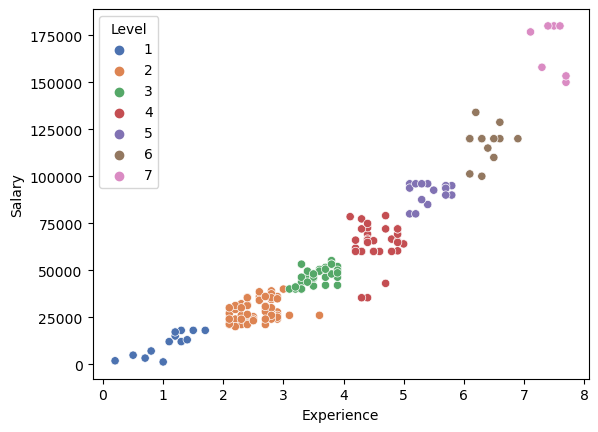

In [41]:
scatter_chart = sns.scatterplot(data=new_dataset,x='Experience',y='Salary',hue = 'Level', palette='deep')

<b>Model Building<b>

We also need to separate the independent and target variables separately as the scikit implemenations require us to provide data in specific format only.

In [42]:
X=new_dataset[['Level','Experience']]
y=new_dataset[['Salary']]

Split dataset into two as training set and test set, here we are using 20% of the dataset as test set

In [43]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Scaling to transform the values of features or variables in a dataset to a similar scale

In [44]:
#Scaling numeric features using sklearn StandardScalar

from sklearn.preprocessing import StandardScaler
numeric=['Level', 'Experience']
sc=StandardScaler()
X_train[numeric]=sc.fit_transform(X_train[numeric])
X_test[numeric]=sc.transform(X_test[numeric])

Train the model using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

lr = LinearRegression()

#Fit X and y 

lr.fit(X_train, y_train)
ypred = lr.predict(X_test)

#Metrics to evaluate your model 

#r2_score(y_test, ypred), mean_absolute_error(y_test, ypred), np.sqrt(mean_squared_error(y_test, ypred))

print ("R²:",r2_score(y_test, ypred))
print ("MAE:",mean_absolute_error(y_test, ypred))
print ("RMSE:", (np.sqrt(mean_squared_error(y_test, ypred))))


R²: 0.9515079928190382
MAE: 5491.127657762672
RMSE: 7349.517010512288


Train the model using Polynomial Linear Regression

In [46]:
from sklearn.preprocessing import PolynomialFeatures

pr = PolynomialFeatures(degree = 4)
X_poly = pr.fit_transform(X)
lr_2 = LinearRegression()

#Fit X and y

lr_2.fit(X_poly, y)
y_pred_poly = lr_2.predict(X_poly)

#Metrics to evaluate your model 

#r2_score(y, y_pred_poly), mean_absolute_error(y, y_pred_poly), np.sqrt(mean_squared_error(y, y_pred_poly))

print ("R²:",r2_score(y, y_pred_poly))
print ("MAE:",mean_absolute_error(y, y_pred_poly))
print ("RMSE:", (np.sqrt(mean_squared_error(y, y_pred_poly))))

R²: 0.9673743224130704
MAE: 4990.3874841789275
RMSE: 6802.14698811514


In [47]:
# Predict the results with linear regression
print(f'Linear Regression result 1:{lr.predict([[1,1.1]])}')
print(f'Linear Regression result 2:{lr.predict([[2,2.5]])}')
print(f'Linear Regression result 3:{lr.predict([[6,6.9]])}')



Linear Regression result 1:[[93653.08025499]]
Linear Regression result 2:[[131390.47794859]]
Linear Regression result 3:[[280514.9480333]]


In [48]:
# Predict a new result with polynomial regression
print(f'Polynomial Regression result 1:{lr_2.predict(pr.fit_transform([[1,1.1]]))}')
print(f'Polynomial Regression result 2:{lr_2.predict(pr.fit_transform([[2,2.5]]))}')
print(f'Polynomial Regression result 3:{lr_2.predict(pr.fit_transform([[6,6.9]]))}')

Polynomial Regression result 1:[[10898.73866663]]
Polynomial Regression result 2:[[28294.40035238]]
Polynomial Regression result 3:[[112036.93810706]]
